# CRIME DETECTION SYSTEM

## Programming for AI TABA

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
from folium.plugins import HeatMap
import pymysql
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### DB Connection

In [74]:
"""host = "localhost"
user = "root"
password = "root"
database = "crime_detection"

connection = pymysql.connect(host=host, user=user, password=password, db=database)"""

'host = "localhost"\nuser = "root"\npassword = "root"\ndatabase = "crime_detection"\n\nconnection = pymysql.connect(host=host, user=user, password=password, db=database)'

### Load Data

In [75]:
crime_data = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
#sql_query = "SELECT * FROM raw_data"
#crime_data = pd.read_sql(sql_query, connection)
#connection.close()

If the dataset read from cvs file, change the name of the columns to complete the data cleaning

In [76]:

crime_data.rename(columns={
'DR_NO': 'dr_no',
'Date Rptd': 'date_rptd',
'DATE OCC': 'date_occ',
'TIME OCC': 'time_occ',
'AREA ': 'area',
'AREA NAME': 'area_name',
'Rpt Dist No': 'rpt_dist_no',
'Part 1-2': 'part_1-2',
'Crm Cd': 'crm_cd',
'Crm Cd Desc': 'crm_cd_desc',
'Mocodes': 'mocodes',
'Vict Age': 'vict_age',
'Vict Sex': 'vict_sex',
'Vict Descent': 'vict_descent',
'Premis Cd': 'premis_cd',
'Premis Desc': 'premis_desc',
'Weapon Used Cd': 'weapon_used_cd',
'Weapon Desc': 'weapon_desc',
'Status': 'status',
'Status Desc': 'status_desc',
'Crm Cd 1': 'crm_cd_1',
'Crm Cd 2': 'crm_cd_2',
'Crm Cd 3': 'crm_cd_3',
'Crm Cd 4': 'crm_cd_4',
'LOCATION': 'location',
'Cross Street': 'cross_street',
'LAT': 'lat',
'LON': 'lon',              
},inplace= True)

In [77]:
crime_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [78]:
crime_data.tail()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
2135770,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2135771,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2135772,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2135773,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2135774,190805435,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


Dataframe columns name

In [79]:
print(crime_data.columns)

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')


Dataframe columns info

In [80]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135775 entries, 0 to 2135774
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   dr_no           int64  
 1   date_rptd       object 
 2   date_occ        object 
 3   time_occ        int64  
 4   area            int64  
 5   area_name       object 
 6   rpt_dist_no     int64  
 7   part_1-2        int64  
 8   crm_cd          int64  
 9   crm_cd_desc     object 
 10  mocodes         object 
 11  vict_age        int64  
 12  vict_sex        object 
 13  vict_descent    object 
 14  premis_cd       float64
 15  premis_desc     object 
 16  weapon_used_cd  float64
 17  weapon_desc     object 
 18  status          object 
 19  status_desc     object 
 20  crm_cd_1        float64
 21  crm_cd_2        float64
 22  crm_cd_3        float64
 23  crm_cd_4        float64
 24  location        object 
 25  cross_street    object 
 26  lat             float64
 27  lon             float64
dtypes: float64(8

The columns of the dataset are:
1. DR_NO: Report number for the incident (int64)
2. Date Rptd: Date the incident was reported (object, might need to be converted to a datetime format)
3. DATE OCC: Date of occurrence of the incident (object, might need to be converted to a datetime format)
4. TIME OCC: Time of occurrence of the incident (int64)
5. AREA: Area code related to the incident (int64)
6. AREA NAME: Name of the area related to the incident (object)
7. Rpt Dist No: Report district number (int64)
8. Part 1-2: Classification of the incident (int64)
9. Crm Cd: Crime code (int64)
10. Crm Cd Desc: Description of the crime code (object)
11. Mocodes: Modus operandi codes (object)
12. Vict Age: Age of the victim (int64)
13. Vict Sex: Sex of the victim (object)
14. Vict Descent: Descent of the victim (object)
15. Premis Cd: Premises code (float64)
16. Premis Desc: Description of the premises (object)
17. Weapon Used Cd: Weapon code used (float64)
18. Weapon Desc: Description of the weapon used (object)
19. Status: Status of the incident (object)
20. Status Desc: Description of the status (object)
21. Crm Cd 1-4: Additional crime codes (float64)
22. LOCATION: Location of the incident (object)
23. Cross Street: Cross street of the incident (object)
24. LAT: Latitude coordinates (float64)
25. LON: Longitude coordinates (float64)

In [81]:
crime_data.shape

(2135775, 28)

In [82]:
crime_data.isnull().sum()

dr_no                   0
date_rptd               0
date_occ                0
time_occ                0
area                    0
area_name               0
rpt_dist_no             0
part_1-2                0
crm_cd                  0
crm_cd_desc             0
mocodes            233095
vict_age                0
vict_sex           201708
vict_descent       201753
premis_cd              47
premis_desc           194
weapon_used_cd    1418947
weapon_desc       1418948
status                  3
status_desc             0
crm_cd_1               10
crm_cd_2          1992718
crm_cd_3          2132073
crm_cd_4          2135667
location                0
cross_street      1777690
lat                     0
lon                     0
dtype: int64

### Preprocessing & Visualisation

#### Date of Crime Reported and Crime Occurred Converting

Spliting Crime Reported, converting to date time Crime Reported and droping column date_time_rptd

In [83]:
crime_data['date_time_rptd'] = crime_data['date_rptd'].str.split()
crime_data['date_rptd'] = pd.to_datetime(crime_data['date_time_rptd'].apply(lambda x: x[0]), format="%m/%d/%Y")
crime_data['time_rptd'] = crime_data['date_time_rptd'].apply(lambda x: x[1])
crime_data.drop(columns=['date_time_rptd'], inplace=True, axis=1)

Spliting Crime Occurred, converting to date time Crime Occurred and droping column date_time_occ

In [84]:
crime_data['date_time_occ'] = crime_data['date_occ'].str.split()
crime_data['date_occ'] = pd.to_datetime(crime_data['date_time_occ'].apply(lambda x: x[0]), format="%m/%d/%Y")
crime_data['time_occ'] = crime_data['date_time_occ'].apply(lambda x: x[1])
crime_data.drop(columns=['date_time_occ'], inplace=True, axis=1)

Create year field from date_occ

In [85]:
crime_data['year'] = crime_data['date_occ'].dt.strftime('%Y')

Filter the data for the years 2010 to 2019  
Group by year and count the total criminal cases for each year

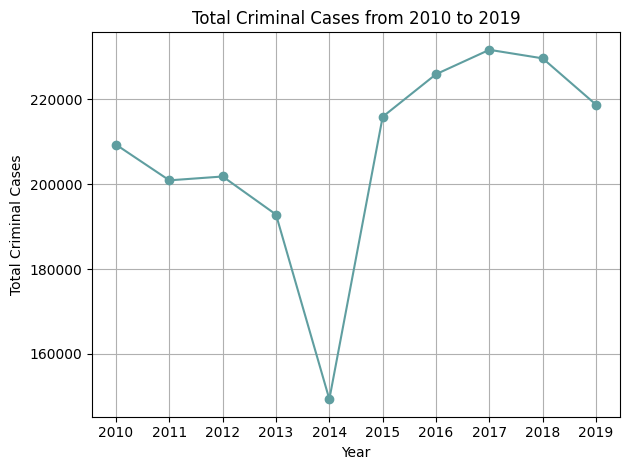

In [86]:
crime_by_year = crime_data[(crime_data['year'] >= '2010') & (crime_data['year'] <= '2019')].groupby('year').size()
plt.plot(crime_by_year.index, crime_by_year.values, marker='o', linestyle='-', color = 'cadetblue')
plt.title('Total Criminal Cases from 2010 to 2019')
plt.xlabel('Year')
plt.ylabel('Total Criminal Cases')
plt.grid(True)
plt.xticks(crime_by_year.index)
plt.tight_layout()
plt.show()

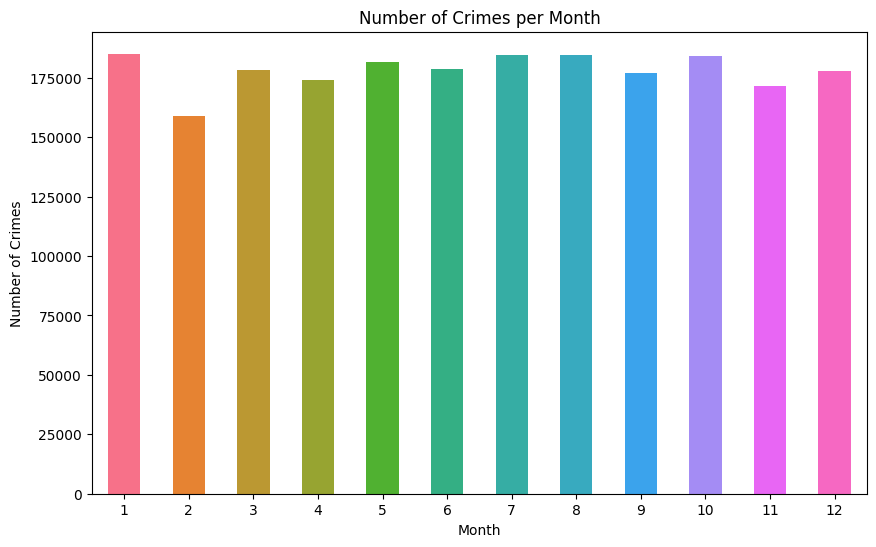

In [87]:
crimes_per_month = crime_data['date_occ'].dt.month.value_counts().sort_index()
num_months = len(crimes_per_month)
palette = sns.color_palette("husl", num_months)
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color=palette)
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)  # Keep x-axis labels vertical
plt.show()

#### Area

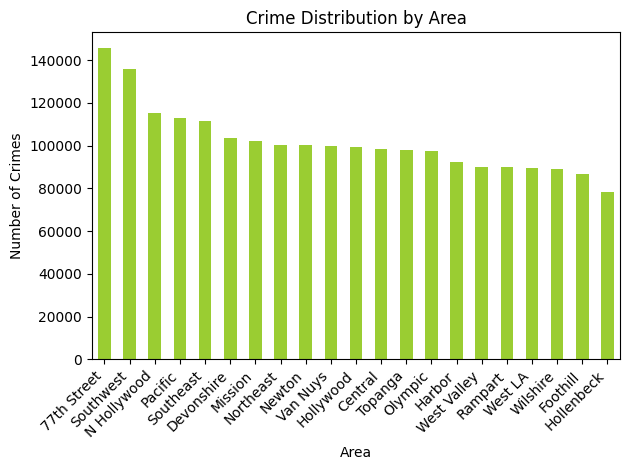

In [88]:
# Grouping data by 'AREA NAME' and counting occurrences
crime_by_area = crime_data['area_name'].value_counts()
crime_by_area.plot(kind='bar', color='yellowgreen')
plt.title('Crime Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

#### Crime

In [89]:
crime_data.drop(columns=['crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'mocodes'], inplace=True)

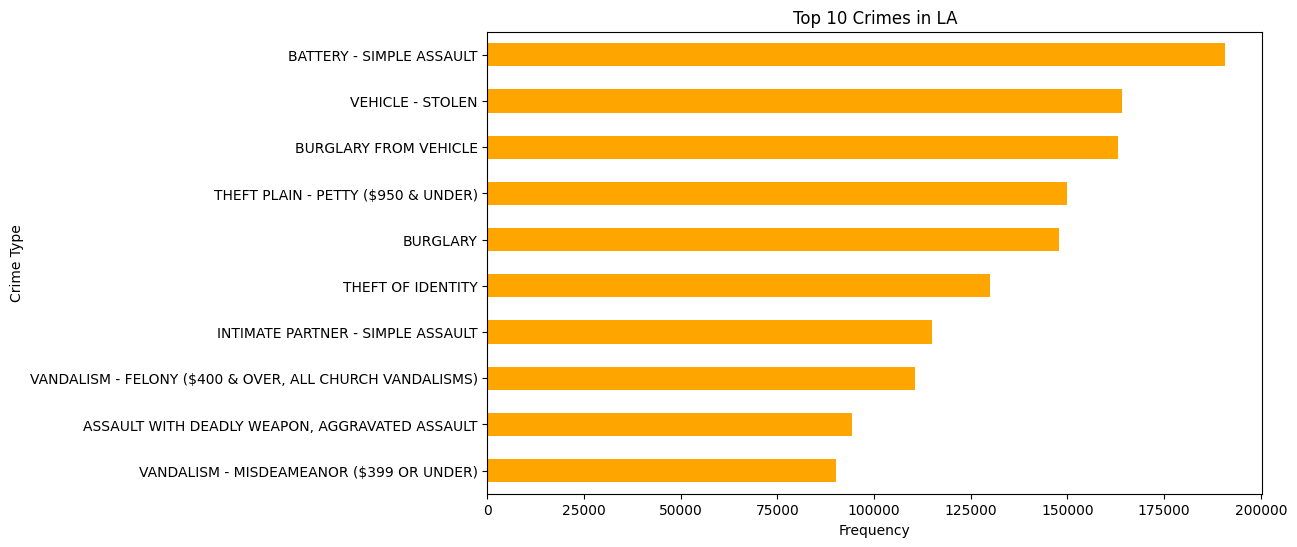

In [90]:
top_crime_types = crime_data['crm_cd_desc'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_crime_types.plot(kind='barh', color='orange')
plt.title('Top 10 Crimes in LA')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.show()

In [91]:
crime_data['weapon_desc'].value_counts()

weapon_desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    433863
VERBAL THREAT                                      59022
UNKNOWN WEAPON/OTHER WEAPON                        57719
HAND GUN                                           34668
SEMI-AUTOMATIC PISTOL                              13276
                                                   ...  
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                   11
ANTIQUE FIREARM                                        7
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    6
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       3
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

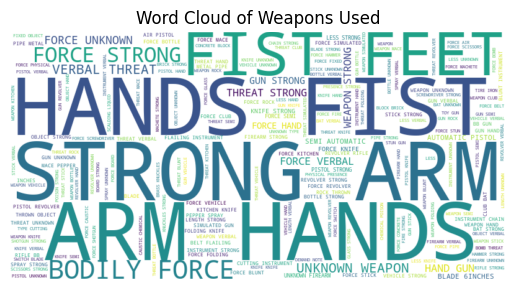

In [92]:
weapons_text = ' '.join(crime_data['weapon_desc'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(weapons_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapons Used')
plt.show()

#### Victim

In [93]:
# Calculate the mean of non-zero positive ages
mean_age = np.mean(crime_data.loc[(crime_data['vict_age'] > 0), 'vict_age'])
crime_data.loc[(crime_data['vict_age'] <= 0), 'vict_age'] = mean_age
crime_data['vict_age'] = crime_data['vict_age'].astype(int)

crime_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,location,cross_street,lat,lon,time_rptd,year
0,1307355,2010-02-20,2010-02-20,12:00:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,NaN,NaN,AA,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695,12:00:00,2010
1,11401303,2010-09-13,2010-09-12,12:00:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,12:00:00,2010
2,70309629,2010-08-09,2010-08-09,12:00:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,NaN,IC,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524,12:00:00,2010
3,90631215,2010-01-05,2010-01-05,12:00:00,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,102.0,HAND GUN,IC,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,12:00:00,2010
4,100100501,2010-01-03,2010-01-02,12:00:00,1,Central,176,1,122,"RAPE, ATTEMPTED",...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488,12:00:00,2010


In [94]:
crime_data['vict_sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-', 'N'], dtype=object)

In [95]:
crime_data['vict_sex'] = crime_data['vict_sex'].replace('nan', np.nan)

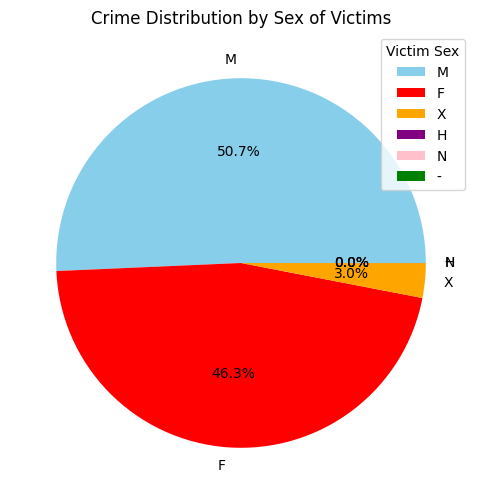

In [96]:
plt.figure(figsize=(8, 6))
crime_data['vict_sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'red', 'orange','purple', 'pink','green'])
plt.title('Crime Distribution by Sex of Victims')
plt.ylabel('')
plt.legend(title='Victim Sex', loc='upper right')
plt.show()

In [97]:
crime_data['vict_sex'] = crime_data["vict_sex"].replace(['H', 'N','-'], 'X')
crime_data['vict_sex'].value_counts()

vict_sex
M    980468
F    894924
X     58675
Name: count, dtype: int64

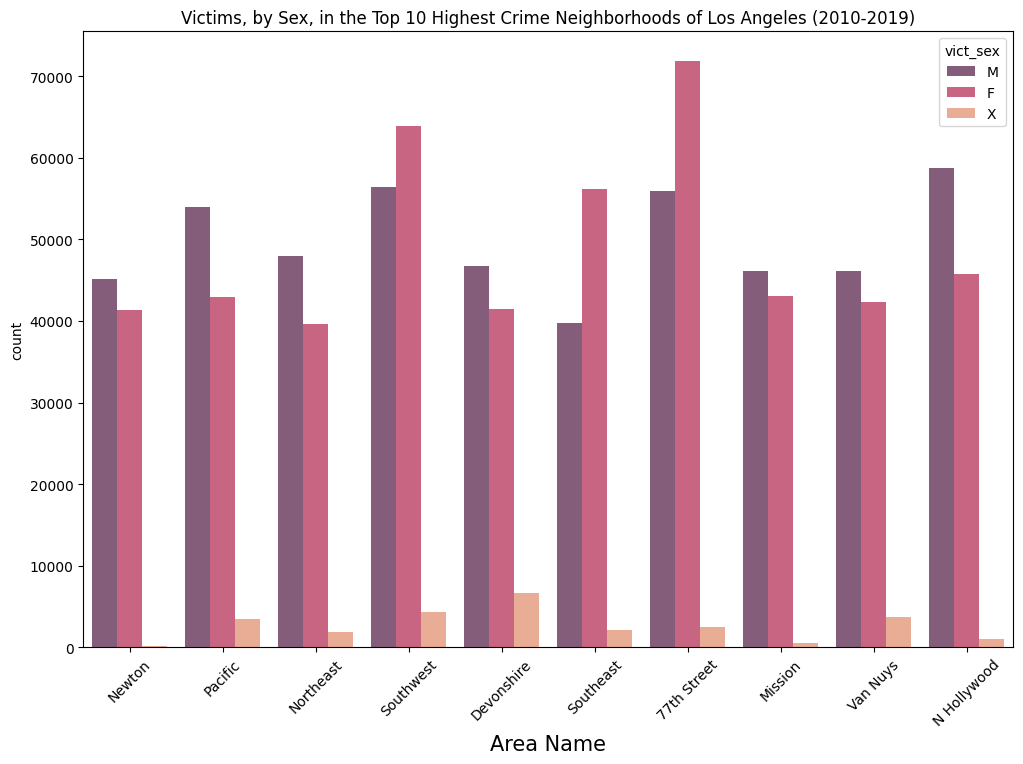

In [98]:
top_10_areas = crime_data['area_name'].value_counts().head(10).index.tolist()
df_top_10_areas = crime_data[crime_data['area_name'].isin(top_10_areas)]

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='area_name', hue='vict_sex', data=df_top_10_areas, palette='rocket', alpha=0.75)
ax.set_title('Victims, by Sex, in the Top 10 Highest Crime Neighborhoods of Los Angeles (2010-2019)')
ax.set_xlabel('Area Name', fontsize=15)
plt.xticks(rotation=45) 
plt.show()

In [99]:
crime_data['vict_descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', nan, 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [100]:
crime_data['vict_descent'] = crime_data['vict_descent'].replace('nan', np.nan)
crime_data['vict_descent'] = crime_data['vict_descent'].replace('-', np.nan)

In [101]:
victims = {
      "A": "Asian",
      "B": "Black",
      "C": "Chinese",
      "D": "Cambodian",
      "F": "Filipino",
      "G": "Guamanian",
      "H": "Hispanic/Latin/Mexican",
      "I": "American Indian/Alaskan Native",
      "J": "Japanese",
      "K": "Korean",
      "L": "Laotian",
      "O": "Other",
      "P": "Pacific Islander",
      "S": "Samoan",
      "U": "Hawaiian",
      "V": "Vietnamese",
      "W": "White",
      "X": "Unknown",
      "Z": "Asian Indian"
  }

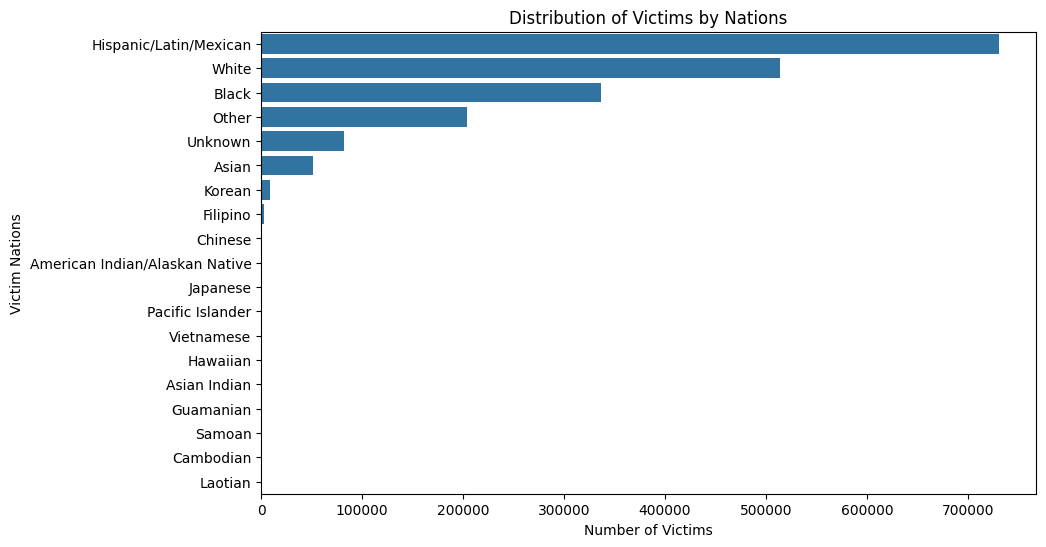

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=crime_data['vict_descent'].map(victims), order=crime_data['vict_descent'].map(victims).value_counts().index)
plt.title('Distribution of Victims by Nations')
plt.ylabel('Victim Nations')
plt.xlabel('Number of Victims')
plt.show()

In [103]:
crime_data = crime_data.dropna(subset=['vict_sex', 'vict_descent'])

In [104]:
crime_data.shape

(1934016, 25)

In [105]:
aggregated_data = crime_data.groupby(['lat', 'lon']).size().reset_index(name='crime_count')
la_latitude = 34.052235
la_longitude = -118.243683
la_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=10)

# Create a HeatMap layer using the aggregated crime data
heat_data = aggregated_data[['lat', 'lon', 'crime_count']].values.tolist()
HeatMap(heat_data, radius=15).add_to(la_map)

# Display the map
la_map

### Crime Prediction

Selecting features and target

In [ ]:
# Özelliklerin ve hedefin seçilmesi
features = crime_data[['date_occ', 'time_occ', 'area']]
target = crime_data['crm_cd']

Categorical data digitization and feature scaling

In [ ]:
# Kategorik verileri sayısal hale getirme ve özellik ölçeklendirme
features = pd.get_dummies(features)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Separation into training and testing sets

In [ ]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)


Variability of the model (depth limitation to reduce complexity)

In [ ]:
# Modelin oluşturulması (karmaşıklığın azaltılması için derinlik sınırlaması)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)

Evaluate the generalization process of the model using cross operations

In [ ]:
# Çapraz doğrulama kullanarak modelin genelleştirme performansını değerlendirme
cross_val_accuracy = cross_val_score(classifier, X_train, y_train, cv=5)
print(f"Cross Validation Accuracy Rates: {cross_val_accuracy}")
print(f"Average Cross Validation Accuracy: {np.mean(cross_val_accuracy)}")

Make predictions on the test set

In [ ]:
# Test seti üzerinde tahmin yapma
y_pred = classifier.predict(X_test)

Shown by the model's test set accuracy score

In [ ]:
# Modelin test seti doğruluk skorunun hesaplanması
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy Rate: {accuracy}")